<a href="https://colab.research.google.com/github/Mantas-it/SME/blob/main/Pradine_analize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naudojami duomenys: stanford data TWITCH ENGB. Grafo duomenys buvo suskaičiuoti naudojant Cytoscape. https://snap.stanford.edu/data/twitch-social-networks.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
url="https://raw.githubusercontent.com/Mantas-it/SME/main/table_all.csv"
data = pd.read_csv(url)

In [ ]:
data.describe()

,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,name,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,shared name,Stress,TopologicalCoefficient
count,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7126.0,7126.000000,7126.0,7126.000000,7126.0,7126.000000,7.126000e+03,7126.000000
mean,3.677616,0.000376,0.276473,0.130928,9.914117,7.001684,3562.500000,85.950819,0.0,9.914117,0.0,0.996281,0.0,3562.500000,2.940106e+05,0.195016
std,0.494870,0.002652,0.034479,0.206261,22.190263,0.581586,2057.243342,109.800184,0.0,22.190263,0.0,0.000687,0.0,2057.243342,2.323678e+06,0.169795
min,2.401825,0.000000,0.146662,0.000000,1.000000,6.000000,0.000000,1.500000,0.0,1.000000,0.0,0.991919,0.0,0.000000,0.000000e+00,0.000000
25%,3.320877,0.000002,0.253021,0.000000,2.000000,7.000000,1781.250000,19.867857,0.0,2.000000,0.0,0.995900,0.0,1781.250000,1.431000e+03,0.060580
50%,3.593333,0.000042,0.278293,0.057143,5.000000,7.000000,3562.500000,43.000000,0.0,5.000000,0.0,0.996398,0.0,3562.500000,2.993700e+04,0.148732
75%,3.952246,0.000281,0.301125,0.166667,11.000000,7.000000,5343.750000,110.984848,0.0,11.000000,0.0,0.996777,0.0,5343.750000,1.838340e+05,0.310948
max,6.818386,0.126767,0.416350,1.000000,720.000000,10.000000,7125.000000,720.000000,0.0,720.000000,0.0,0.998053,0.0,7125.000000,1.187009e+08,0.857143


In [ ]:
print(data.dtypes)

AverageShortestPathLength       float64
BetweennessCentrality           float64
ClosenessCentrality             float64
ClusteringCoefficient           float64
Degree                            int64
Eccentricity                      int64
IsSingleNode                       bool
name                              int64
NeighborhoodConnectivity        float64
NumberOfDirectedEdges             int64
NumberOfUndirectedEdges           int64
PartnerOfMultiEdgedNodePairs      int64
Radiality                       float64
selected                           bool
SelfLoops                         int64
shared name                       int64
Stress                            int64
TopologicalCoefficient          float64
dtype: object


# Duomenys yra TWITCH žaidimų transliavimo (Streaming) draugystės tarp vartotojų tinklas. Twitch platforma turi daug skirtingų žaidimų, kuriuos galima žiūrėti, kai kurie vartotojai renkasi žiūrėti vieną arba kelis žaidimus. Keliama hipotezė, ar galima nuspėti, kaip yra linkęs vienas vartotojas priklausyti klasteriui (arba kitaip sąkant, kaip yra linkęs žiūrėti arba žaisti vieną žaidimą, o ne daugelį). Prognozuojama Clustering Ceofficient.

In [ ]:
# padalinami duomenys į prognozuojamus Y ir įėjimo duomenis X
df=pd.DataFrame(data)
y=df[['ClusteringCoefficient']]
X=df[['ClosenessCentrality','BetweennessCentrality','Degree','NeighborhoodConnectivity','TopologicalCoefficient']]

In [ ]:
X_train.describe()

,ClosenessCentrality,BetweennessCentrality,Degree,NeighborhoodConnectivity,TopologicalCoefficient
count,6413.000000,6413.000000,6413.000000,6413.000000,6413.000000
mean,0.663632,0.003013,0.013757,0.119457,0.227642
std,0.082860,0.021876,0.031579,0.152681,0.198240
min,0.352257,0.000000,0.001389,0.002083,0.000000
25%,0.606995,0.000017,0.002778,0.027652,0.070765
50%,0.667798,0.000322,0.006944,0.059465,0.174419
75%,0.722738,0.002214,0.015278,0.154259,0.363304
max,1.000000,1.000000,1.000000,1.000000,1.000000


#Duomenys padalinami į testavimo ir mokymo duomenis

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1)

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#Testuojami skirtingi metodai, tiesinė regresija, k-kaimynų regresija

In [ ]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

lr = LinearRegression()
#lasso = Lasso() # gal reikia patikrinti alfa - nes Lasso iš viso neveikia čia
ridge = Ridge()
#knn = KNeighborsRegressor()
knn1 = KNeighborsRegressor(n_neighbors=1)
#knn9 = KNeighborsRegressor(n_neighbors=9)
#gp = GaussianProcessRegressor()


for model in [lr, knn1, ridge]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(model)    
    #print(model.coef_)
    print("\tExplained variance:", explained_variance_score(y_test, predictions))
    print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    print("\tR2 score:", r2_score(y_test, predictions))
    print()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
	Explained variance: 0.16607894196206052
	Mean absolute error: 0.12998316736992446
	R2 score: 0.164251105419029

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')
	Explained variance: 0.2841446819648269
	Mean absolute error: 0.08960022960236369
	R2 score: 0.2832935471354211

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
	Explained variance: 0.16396254074193983
	Mean absolute error: 0.12985417228919618
	R2 score: 0.16202869195855174



# **K kaimynų regresija panašu, kad geriau prognozuoja klasterizavimo koeficientą, R2 score beveik 0.5, kai n=8. (celė žemiau)**

Text(0.5, 0, 'R2 score')

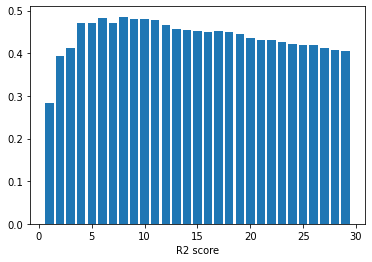

In [ ]:
neigh_vals = []
for neigh in range(1,30):
    model = KNeighborsRegressor(n_neighbors=neigh,metric='euclidean')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    #print(model)    
    neigh_vals.append(r2_score(y_test, predictions))
    #print('Kaimynu skaicius: ',neigh)
    #print("\tExplained variance:", explained_variance_score(y_test, predictions))
    #print("\tMean absolute error:", mean_absolute_error(y_test, predictions))
    #print("\tR2 score:", r2_score(y_test, predictions))
    #print()
plt.bar([x for x in range(1,30)],neigh_vals)
plt.xlabel('R2 score')



#Bandysime Klasifikuoti su decision tree, galbūt yra paprastų taisyklių, pagal ką galima būtų klasifikuoti. Duomenys tokie patys, tačiau buvo nustatyta 0.1 clustering coefficient riba, kuomet mažiau nei 0.1, nelikęs klasterizuotis, o daugiau nei 0.1, linkęs.


In [ ]:
df=pd.DataFrame(data)
y=df[['ClusteringCoefficient']]
X=df[['ClosenessCentrality','BetweennessCentrality','Degree','NeighborhoodConnectivity','TopologicalCoefficient']]
y_r = y
y = y_r > 0.1
#print(y)
y.replace(True,'Linkęs klasterizuotis', inplace=True)
y.replace(False,'Nelinkęs klasterizuotis', inplace=True)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)
y_train.value_counts()
y_test.value_counts()

Training features/target: (6413, 5) (6413, 1)
Testing features/target: (713, 5) (713, 1)


ClusteringCoefficient  
Nelinkęs klasterizuotis    437
Linkęs klasterizuotis      276
dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X, y)
tree.score(X, y)

0.7196182991860791

#Pasižiūrime kas labiausiai įtakoja sprendimą


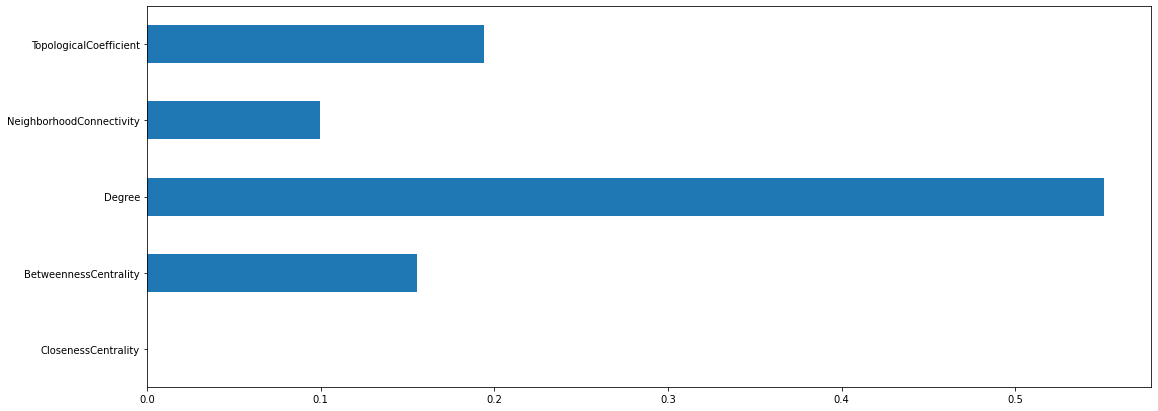

In [ ]:

%matplotlib inline
pd.Series(tree.feature_importances_, index=X.columns).plot.barh(figsize=(18,7));

#Panašu,jog closenes centrality neturi įtakos. Galima nupiešti decision tree

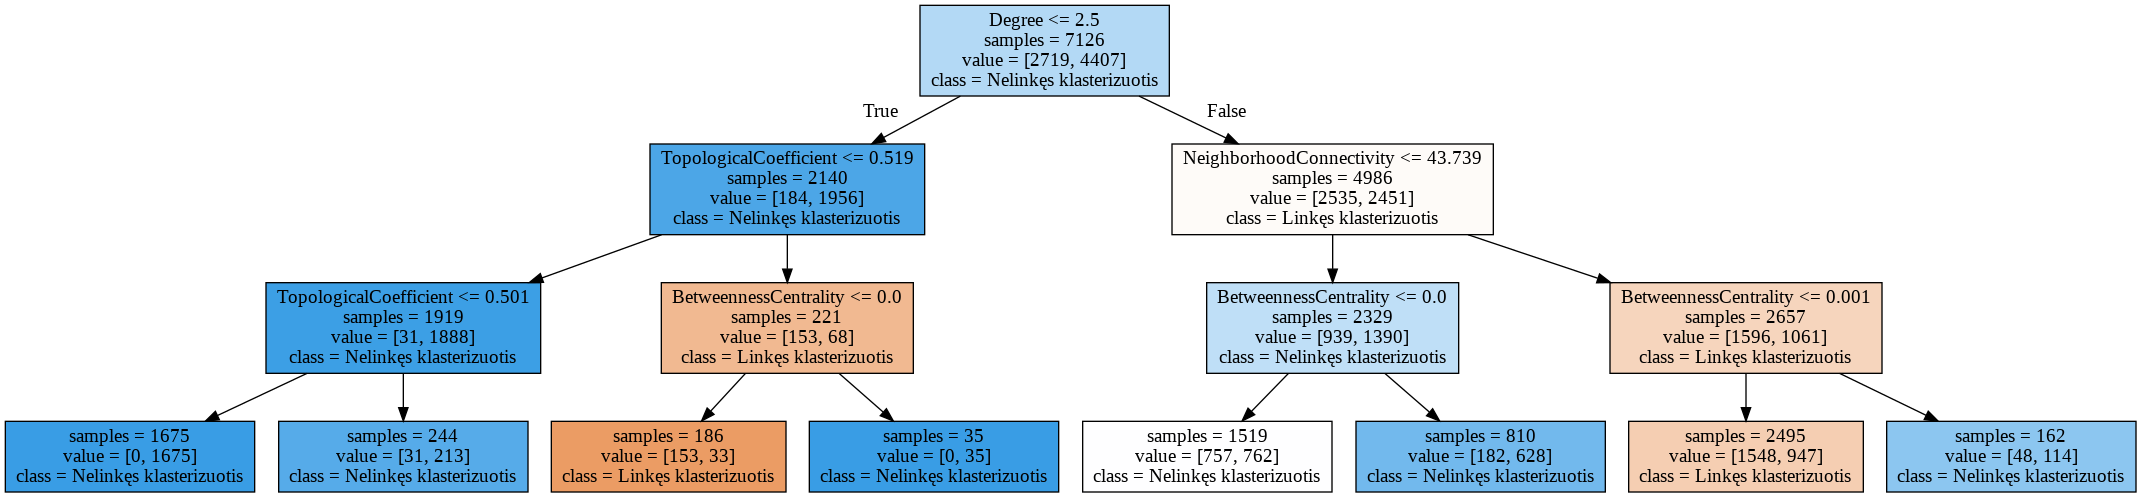

In [ ]:
# Figure out where graphviz executable lives
dotpath = !which dot
from sklearn.tree import export_graphviz
import sys, subprocess
from IPython.display import Image

export_graphviz(tree, feature_names=X.columns, class_names=['Linkęs klasterizuotis','Nelinkęs klasterizuotis'],
                out_file='ml-good.dot', impurity=False, filled=True)
subprocess.check_call([dotpath[0],'-Tpng','ml-good.dot','-o','ml-good.png'])
Image('ml-good.png')

#Pakankamai gerai klasifikuojamas polinkis nepriklausyti klasteriui, atskiria kairėje grafiko pusėje. Tačiau bendrai, kituose galiniuose lapeliuose nėra gerai atskirtų klasių. Pamėginsime kitą metodą, neural networks.

In [ ]:
import tensorflow as tf
tf.add(1, 2).numpy()
from tensorflow import keras
tf.__version__
#keras.__version__


df=pd.DataFrame(data)
y=df[['ClusteringCoefficient']]
X=df[['BetweennessCentrality','Degree','NeighborhoodConnectivity','TopologicalCoefficient']]

y_r = y
y = y_r > 0.1
y.replace(True,1, inplace=True)



#nustatoma baseline accuracy

In [ ]:
print(y.value_counts())

2719/4407*100

ClusteringCoefficient
0.0                      4407
1.0                      2719
dtype: int64


61.69729975039709

#Sudarome X ir Y duomenis, juos normalizuojame. Baseline accuracy, jeigu modelis rinktusi tik vieną klasę, butų 61,697% tikslus, bandysime sukurti modelį, kuris būtų tikslesnis.

In [ ]:
y=np.array(y)
for f in X.columns:
  X[f] = X[f]/X[f].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X.head()

,BetweennessCentrality,Degree,NeighborhoodConnectivity,TopologicalCoefficient
0,0.000229,0.008333,0.062037,0.225012
1,0.000198,0.008333,0.019907,0.201828
2,0.002560,0.025000,0.022454,0.079750
3,0.000401,0.005556,0.172569,0.302719
4,0.009035,0.030556,0.141540,0.079209


# Padaliname duomenis į testavimo ir mokymo. Sudaromas modelis.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.1)
print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)

Training features/target: (6413, 4) (6413, 1)
Testing features/target: (713, 4) (713, 1)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation="relu",input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


# Apmokomas modelis

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.05,verbose=1)

Epoch 1/100
191/191 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6172 - val_loss: 0.6137 - val_accuracy: 0.6542
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.6573 - val_loss: 0.5630 - val_accuracy: 0.6511
Epoch 3/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.6868 - val_loss: 0.5446 - val_accuracy: 0.6791
Epoch 4/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5339 - accuracy: 0.6967 - val_loss: 0.5302 - val_accuracy: 0.6760
Epoch 5/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5255 - accuracy: 0.6968 - val_loss: 0.5213 - val_accuracy: 0.6604
Epoch 6/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5188 - accuracy: 0.7081 - val_loss: 0.5149 - val_accuracy: 0.6542
Epoch 7/100
191/191 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7127 - val_loss: 0.5063 - val_accuracy: 0.6729

# Galime nupiešti apmokymo istorijos grafiką

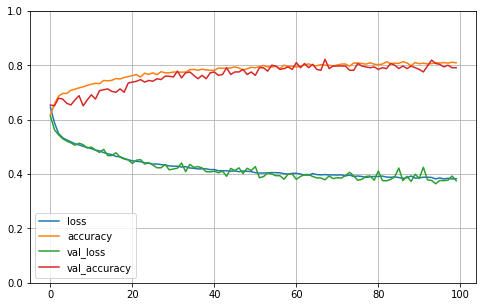

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#Įvertiname modelį, gavome 78% tikslumą

In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7812


[0.4293806850910187, 0.7812061905860901]

# sklearn leidžia įvertinti klasifikavimo tikslumą, ir kitas metrikas pagal prognozuojamą klasę, precision, recall, f1-score. Taip pat sudaroma klaidų matrica (confusion matrix)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix
preds1 = model.predict(X_test,verbose=0)
#print(preds1)
#print(y_test2)
preds1[preds1>=0.5] = 1
preds1[preds1<0.5] = 0
print ('accuracy: ',accuracy_score(y_test, preds1)*100)
print (classification_report(y_test, preds1))
print (multilabel_confusion_matrix(y_test, preds1))

accuracy:  78.12061711079944
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83       437
         1.0       0.79      0.60      0.68       276

    accuracy                           0.78       713
   macro avg       0.78      0.75      0.76       713
weighted avg       0.78      0.78      0.77       713

[[[165 111]
  [ 45 392]]

 [[392  45]
  [111 165]]]


#Neuroninis tinklas geba prognozuoti 78% tikslumu, baseline accuracy yra 62% tikslumas. 

# Testuosime klasterizavimą, bandome klasterių skaičių nuo 0 iki 9.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

inertia=np.zeros(shape=(1,10))
kn=np.zeros(shape=(1,10))
for k in [0,1,2,3,4,5,6,7,8,9]:
    kmeans = KMeans(n_clusters=k+1, n_init=100)
    y_pred = kmeans.fit_predict(X)
    print("clusters: ",k+1, "inertia: ",kmeans.inertia_)
    inertia[0,k]=kmeans.inertia_
    kn[0,k]=k+1

clusters:  1 inertia:  455.1819233914407
clusters:  2 inertia:  248.0060119641777
clusters:  3 inertia:  166.66872899574307
clusters:  4 inertia:  130.2697880798716
clusters:  5 inertia:  96.53843758721592
clusters:  6 inertia:  73.53751338540508
clusters:  7 inertia:  61.7311570357326
clusters:  8 inertia:  53.620282114304835
clusters:  9 inertia:  47.753632364328276
clusters:  10 inertia:  42.99348389228463


Text(0, 0.5, 'inertia')

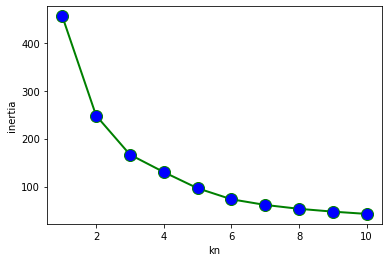

In [ ]:

plt.plot(kn[0,:],inertia[0,:],color='green', marker='o', markerfacecolor='blue',linestyle='solid', linewidth=2, markersize=12)
plt.xlabel('kn')
plt.ylabel('inertia')

#Tikriausiai geriausiai klasterizuojasi į 4-6 klasterius. Pasižiūrėti, kas yra klasteriuose neduos daug naudos, nes matysime tik parametrus (skaičius). 

# Rezultatai: Geriausias regresijos modelis - k-artimiausių kaimynų, kai n=8, R2 = beveik 0.5, tačiau tai pakankamai prastas rezultatas. Tikriausiai reiktų ištestuoti įvairias įėjimo duomenų kombinacijas, kad pasirinkti, kokie yra reikšmingiausi parametrai norint prognozuoti klasterizavimo koeficientą. Klasifikavimas su decision tree tai pat nėra tikslus, nes yra daug lapelių, kurie yra mišrūs, panašu, jog atskirti dvi klases yra sudėtinga. Neuroniniai tinklai atskiria dvi klases 78%, tarp linkusių priklausyti klasteriui ir ne. Vidutiniškai geri rezultatai, taipogi, reiktų papildomai optimizuoti neuroninį tinklą, galbūt būtų pasiektas geresnis rezultatas.Klasterizavimas klasterizuoja geriausiai į 4-6 klasterius, tačiau tikriausiai yra daug dalyvių, kurie žiūri daug žaidimų, todėl yra sudėtinga atskirti į daug klasterių.

#Išvados: vartotojų polinkį klasterizuoti nėra lengva prognozuoti, nes pasiekti rezultatai yra vidutiniški. Tikriausiai dėl duomenų kompleksiškumo reiktų surinkti daugiau duomenų ir optimizuoti algoritmų parametrus.

#Community aptikimas atliktas su CytoScape. Buvo išbandyti keli metodai. Nuotraukos iš eilės: infomap, louvain, oslam


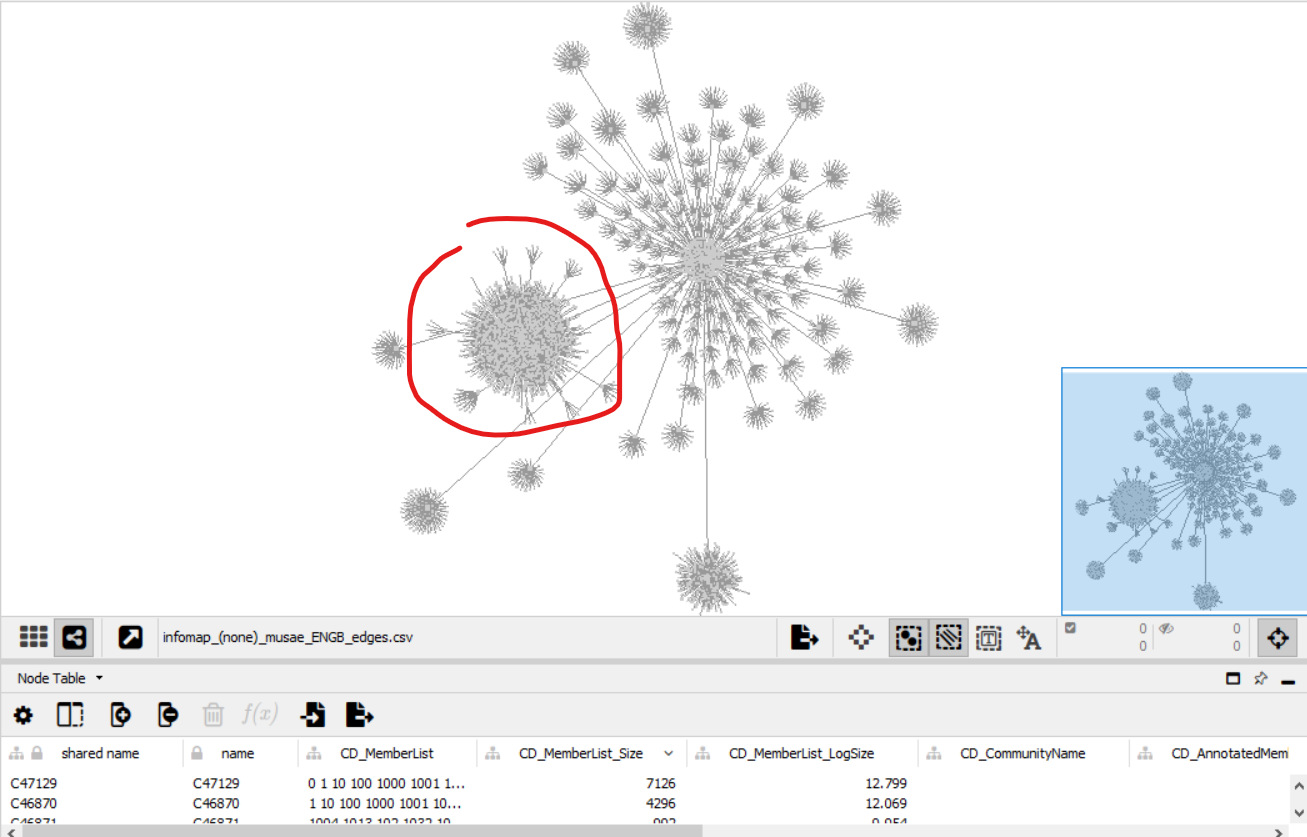

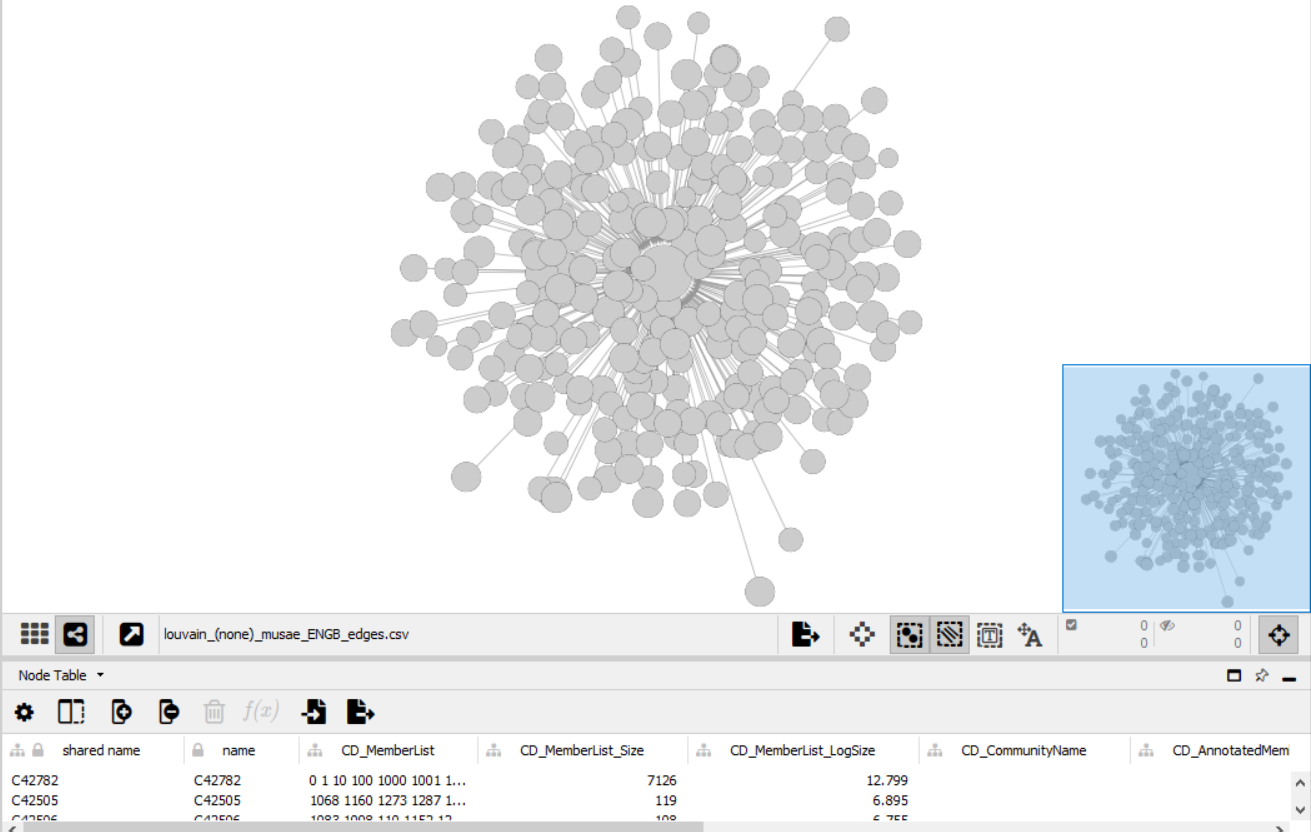

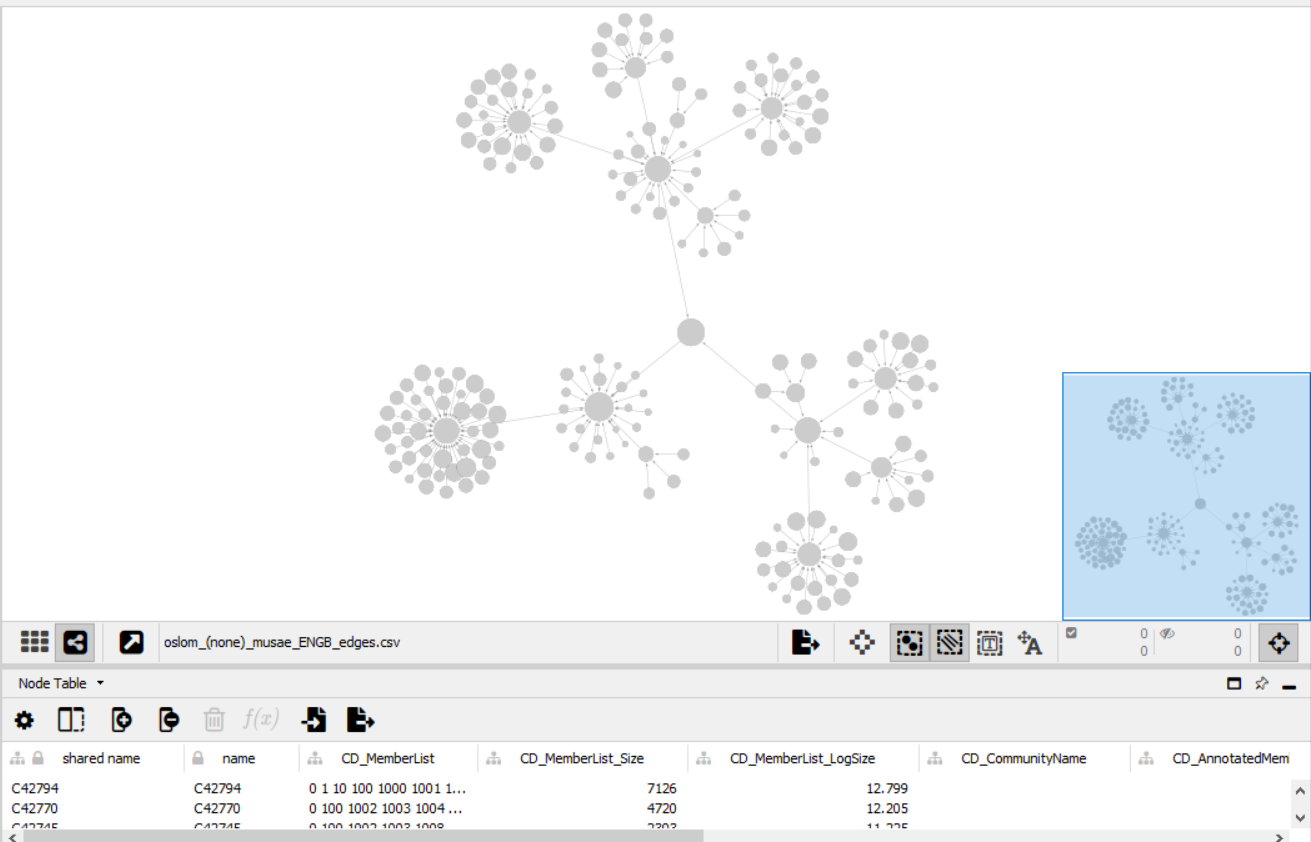

#Community detection rezultatai: Bendruomenės atsiskiria pakankamai gražiai, netgi be papildomų parametrų optimizavimo, pastebima viena didelė bedruomenė didelio žaidimo, ir taip pat kelio bendruomenės, kurios turi artimų sąsajų su kitoms, t.y. panašaus žanro žaidimų.